In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.io import fits
from scipy.interpolate import interp1d
from lmfit.models import VoigtModel
from edibles.utils.voigt_profile import voigt_absorption_line
from lmfit import Model

In [50]:
snr5000 = np.loadtxt("Pentacene_air_snr5000.txt").transpose()
snr2000 = np.loadtxt("Pentacene_air_snr2000.txt").transpose()
snr1000 = np.loadtxt("Pentacene_air_snr1000.txt").transpose()
snr500 = np.loadtxt("Pentacene_air_snr500.txt").transpose()
snr100 = np.loadtxt("Pentacene_air_snr100.txt").transpose()


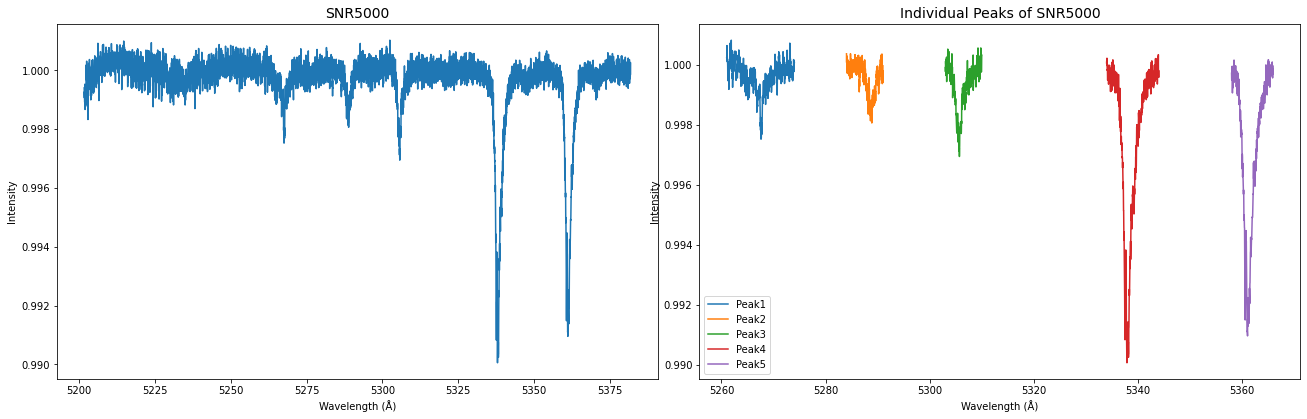

In [51]:
abs_peak = np.array([5267.577214, 5288.886049, 5305.721707, 5337.921532, 5361.114095])
peak_start = np.array([5261.009267, 5284.022748, 5303.017072, 5334.004866, 5358.019634])
peak_end = np.array([5274.000218, 5291.019457, 5310.017477, 5344.020308, 5366.001094])

peak1 = snr5000[:, np.logical_and(snr5000[0]>=peak_start[0], snr5000[0]<=peak_end[0])]
peak2 = snr5000[:, np.logical_and(snr5000[0]>=peak_start[1], snr5000[0]<=peak_end[1])]
peak3 = snr5000[:, np.logical_and(snr5000[0]>=peak_start[2], snr5000[0]<=peak_end[2])]
peak4 = snr5000[:, np.logical_and(snr5000[0]>=peak_start[3], snr5000[0]<=peak_end[3])]
peak5 = snr5000[:, np.logical_and(snr5000[0]>=peak_start[4], snr5000[0]<=peak_end[4])]

fig,axs = plt.subplots(1,2,figsize=(18,6))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
axs[0].plot(snr5000[0], snr5000[1])
axs[0].set_title('SNR5000', size=14)
axs[0].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')
axs[1].plot(peak1[0], peak1[1], label='Peak1')
axs[1].plot(peak2[0], peak2[1], label='Peak2')
axs[1].plot(peak3[0], peak3[1], label='Peak3')
axs[1].plot(peak4[0], peak4[1], label='Peak4')
axs[1].plot(peak5[0], peak5[1], label='Peak5')
axs[1].set_title('Individual Peaks of SNR5000', size=14)
axs[1].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')
plt.legend()

The standard deviation between region 3&4 is,  0.0002402523653397399


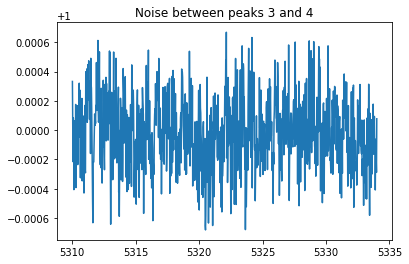

In [52]:
p34 = snr5000[:, np.logical_and(snr5000[0]>=peak_end[2], snr5000[0]<=peak_start[3])]
plt.plot(p34[0], p34[1]) 
plt.title('Noise between peaks 3 and 4')
sd_p34 = np.std(p34[1])
print('The standard deviation between region 3&4 is, ',sd_p34)

In [61]:
# importing VoigtModel to fit out the peak4 and peak5 of the actual lab spectra of Pentacene.
mod=VoigtModel()

# giving peak data for guessing the parameters for fitting and obtaining a fitted voigt function on the peaks (instead of dips)
par1 = mod.guess(1-peak1[1], x=peak1[0])
res1 = mod.fit(1-peak1[1], par1, weights=1/((sd_p34)), x=peak1[0])
par2 = mod.guess(1-peak2[1], x=peak2[0])
res2 = mod.fit(1-peak2[1], par2, weights=1/((sd_p34)), x=peak2[0])
par3 = mod.guess(1-peak3[1], x=peak3[0])
res3 = mod.fit(1-peak3[1], par3, weights=1/((sd_p34)), x=peak3[0])
par4 = mod.guess(1-peak4[1], x=peak4[0])
res4 = mod.fit(1-peak4[1], par4, weights=1/((sd_p34)), x=peak4[0])
par5 = mod.guess(1-peak5[1], x=peak5[0])
res5 = mod.fit(1-peak5[1], par5, weights=1/((sd_p34)), x=peak5[0])

print(res1.fit_report()); print(res2.fit_report()); print(res3.fit_report()); print(res4.fit_report()); print(res5.fit_report())

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 566
    # variables        = 3
    chi-square         = 1089.75077
    reduced chi-square = 1.93561415
    Akaike info crit   = 376.792383
    Bayesian info crit = 389.808165
[[Variables]]
    amplitude:  0.00460652 +/- 1.5910e-04 (3.45%) (init = 0.0460235)
    center:     5267.56592 +/- 0.04202417 (0.00%) (init = 5267.324)
    sigma:      0.68219171 +/- 0.03067641 (4.50%) (init = 2.010233)
    gamma:      0.68219171 +/- 0.03067641 (4.50%) == 'sigma'
    fwhm:       2.45677063 +/- 0.06717897 (2.73%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     0.00140932 +/- 3.6930e-05 (2.62%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.652
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   =

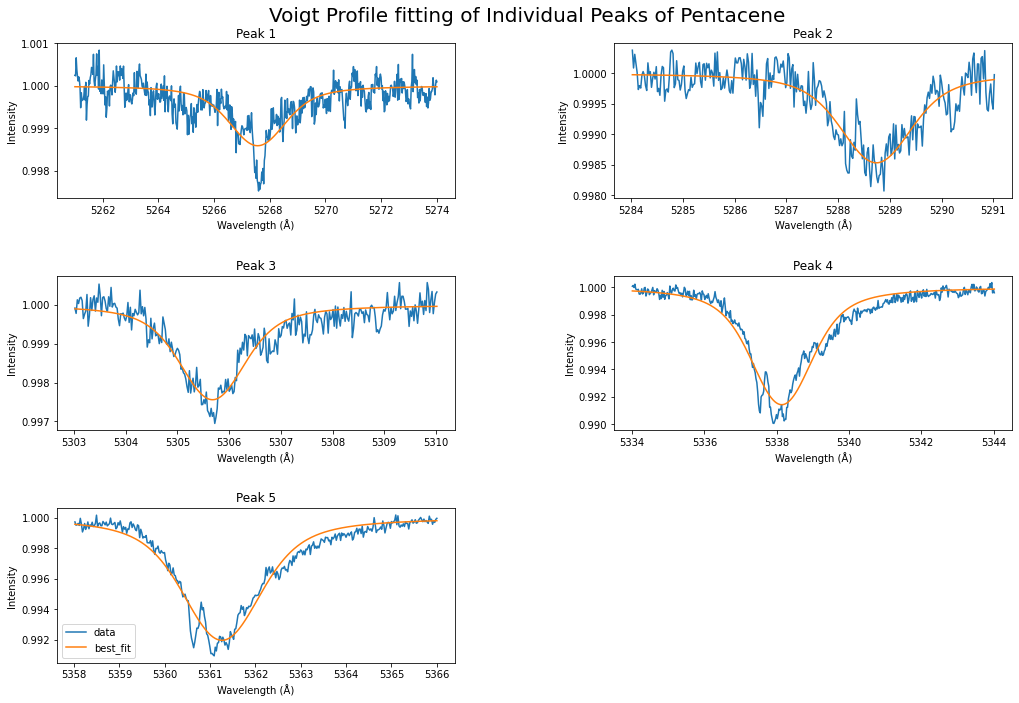

In [54]:
fig, axs = plt.subplots(3, 2, figsize=(14,10))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0,0].plot(peak1[0], peak1[1], label='data')
axs[0,0].plot(peak1[0], 1-res1.best_fit, label='best_fit') #turning the fitted voigt peak into a voigt absoprtion dip
axs[0,0].set_title('Peak 1')
axs[0,0].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')

axs[0,1].plot(peak2[0], peak2[1], label='data')
axs[0,1].plot(peak2[0], 1-res2.best_fit, label='best_fit')
axs[0,1].set_title('Peak 2')
axs[0,1].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')

axs[1,0].plot(peak3[0], peak3[1], label='data')
axs[1,0].plot(peak3[0], 1-res3.best_fit, label='best_fit')
axs[1,0].set_title('Peak 3')
axs[1,0].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')

axs[1,1].plot(peak4[0], peak4[1], label='data')
axs[1,1].plot(peak4[0], 1-res4.best_fit, label='best_fit')
axs[1,1].set_title('Peak 4')
axs[1,1].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')

axs[2,0].plot(peak5[0], peak5[1], label='data')
axs[2,0].plot(peak5[0], 1-res5.best_fit, label='best_fit')
axs[2,0].set_title('Peak 5')
axs[2,0].set(xlabel = 'Wavelength (Å)', ylabel = 'Intensity')
    
fig.delaxes(axs[2][1])
plt.suptitle('Voigt Profile fitting of Individual Peaks of Pentacene', size=20)
plt.legend()
plt.subplots_adjust(hspace=0.5, wspace=0.4)

In [55]:
# dividing the wavelength regime of the spectrum into five equal parts
ix1_d = snr5000[0].size//5
ix2_d = 2*snr5000[0].size//5
ix3_d = 3*snr5000[0].size//5
ix4_d = 4*snr5000[0].size//5
ix5_d = snr5000[0].size


In [70]:
# passing on the different wavelength parts as guess parameters for different peaks while fitting instead of 
# manually passing values, since then the guess parameters were giving same initial values for fitting of each peak.

vm1 = VoigtModel(prefix='Vm1_')
par = vm1.guess(1-snr5000[1, :ix1_d],snr5000[0, :ix1_d])
vm2 = VoigtModel(prefix='Vm2_')
par.update(vm2.guess(1-snr5000[1, ix1_d:ix2_d],snr5000[0, ix1_d:ix2_d]))
vm3 = VoigtModel(prefix='Vm3_')
par.update(vm3.guess(1-snr5000[1, ix2_d:ix3_d],snr5000[0, ix2_d:ix3_d]))
vm4 = VoigtModel(prefix='Vm4_')
par.update(vm4.guess(1-snr5000[1, ix3_d:ix4_d],snr5000[0, ix3_d:ix4_d]))
vm5 = VoigtModel(prefix='Vm5_')
par.update(vm5.guess(1-snr5000[1, ix4_d:ix5_d],snr5000[0, ix4_d:ix5_d]))

mod=vm1+vm2+vm3+vm4+vm5
res = mod.fit(1-snr5000[1], par, weights=1/(sd_p34), x=snr5000[0])

[[Model]]
    ((((Model(voigt, prefix='Vm1_') + Model(voigt, prefix='Vm2_')) + Model(voigt, prefix='Vm3_')) + Model(voigt, prefix='Vm4_')) + Model(voigt, prefix='Vm5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 410
    # data points      = 7759
    # variables        = 15
    chi-square         = 17321.2310
    reduced chi-square = 2.23672921
    Akaike info crit   = 6261.09396
    Bayesian info crit = 6365.44309
[[Variables]]
    Vm1_amplitude:  0.00452027 +/- 1.6810e-04 (3.72%) (init = 0.2099783)
    Vm1_center:     5267.57033 +/- 0.04401320 (0.00%) (init = 5222.129)
    Vm1_sigma:      0.66299515 +/- 0.03207376 (4.84%) (init = 11.36388)
    Vm1_gamma:      0.66299515 +/- 0.03207376 (4.84%) == 'Vm1_sigma'
    Vm1_fwhm:       2.38763821 +/- 0.07023906 (2.94%) == '1.0692*Vm1_gamma+sqrt(0.8664*Vm1_gamma**2+5.545083*Vm1_sigma**2)'
    Vm1_height:     0.00142297 +/- 4.0213e-05 (2.83%) == '(Vm1_amplitude/(max(1e-15, Vm1_sigma*sqrt(2*pi))))*wofz((1j*Vm1_g

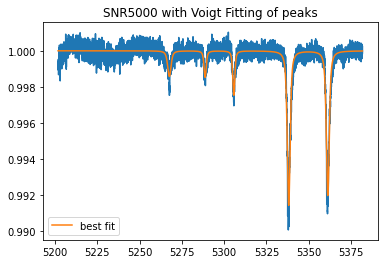

In [71]:
print(res.fit_report())
plt.plot(snr5000[0], snr5000[1])
plt.plot(snr5000[0], 1-res.best_fit, '-', label='best fit')
plt.title('SNR5000 with Voigt Fitting of peaks')
plt.legend()

In [58]:
minima = find_peaks(1-snr5000[1],height=0.001690, distance=720)
if 5267.600206 in snr5000[0, minima[0]] and 5288.886049 in snr5000[0, minima[0]] and 5305.721707 in snr5000[0, minima[0]] and 5337.921532 in snr5000[0, minima[0]] and 5361.114095:
    print("Ok")
print(minima[0].size)    
print(snr5000[0,minima[0]])

Ok
5
[5267.600206 5288.886049 5305.721707 5337.921532 5361.090278]


In [76]:
c1 = res.params['Vm1_center'].value
c2 = res.params['Vm2_center'].value
c3 = res.params['Vm3_center'].value
c4 = res.params['Vm4_center'].value
c5 = res.params['Vm5_center'].value
peak_center=np.array([c1, c2, c3, c4, c5])

fwhm1 = res.params['Vm1_fwhm'].value
fwhm2 = res.params['Vm2_fwhm'].value
fwhm3 = res.params['Vm3_fwhm'].value
fwhm4 = res.params['Vm4_fwhm'].value
fwhm5 = res.params['Vm5_fwhm'].value
fwhm = np.array([fwhm1, fwhm2, fwhm3, fwhm4, fwhm5])

w1 = 4*fwhm1; w2 = 4*fwhm2; w3 = 4*fwhm3; w4 = 4*fwhm4; w5 = 4*fwhm5;
wt = np.array([w1, w2, w3, w4, w5])

hwhm1 = fwhm1/2
hwhm2 = fwhm2/2
hwhm3 = fwhm3/2
hwhm4 = fwhm4/2
hwhm5 = fwhm5/2
hwhm = np.array([hwhm1, hwhm2, hwhm3, hwhm4, hwhm5])

nw1 = w1/hwhm1; nw2 = w2/hwhm2; nw3 = w3/hwhm3; nw4 = w4/hwhm4; nw5 = w5/hwhm5; 
nwt = np.array([nw1, nw2, nw3, nw4, nw5])

In [77]:
# Creating arrays manually for the absorptions.
peaks = np.zeros((5,2))
peaks[0,0] = c1           #center value of abs
peaks[0,1] = fwhm1           #FWHM values of abs

peaks[1,0] = c2
peaks[1,1] = fwhm2

peaks[2,0] = c3
peaks[2,1] = fwhm3

peaks[3,0] = c4
peaks[3,1] = fwhm4

peaks[4,0] = c5
peaks[4,1] = fwhm5

In [112]:
#Function for Spectral stacking, which takes in the input as an interger which is the SNR value of the file with the 
# spectral data

def spectral_stacker_voigt(fdata,peaks):
    
    No_Peaks = peaks.shape[0]
    fpeaks = np.empty(shape=No_Peaks, dtype=object)
    
    ffig, faxs = plt.subplots(3, 2, figsize=(14,10))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    faxs[0,0].plot(fdata[0, :], fdata[1, :])
    faxs[0,0].set_title('Lab Spectrum')
    faxs[0,0].set(xlabel = 'Wavelength (Å)', ylabel = 'Relative intensity')
    
    
    # Creating separate arrays for each absorption in the spectra
    for i1 in range(No_Peaks):
        fpeaks[i1] = fdata[:,np.logical_and(fdata[0,:]>=peaks[i1,0]-2*peaks[i1,1], fdata[0,:]<=peaks[i1,0]+2*peaks[i1,1])]
        p = 'Peak'+str(i1+1)
        faxs[0,1].plot(fpeaks[i1][0,:], fpeaks[i1][1,:], label=p)
    faxs[0,1].set_title('Peaks')
    faxs[0,1].set(xlabel = 'Wavelength (Å)', ylabel = 'Relative intensity')
    faxs[0,1].legend()
    
    fDshft = fpeaks
    for j1 in range (No_Peaks):
        fDshft[j1][0,:] = fpeaks[j1][0,:]-peaks[j1,0]
        fDshft[j1][1,:] = fpeaks[j1][1,:]
        shp = 'Peak ' + str(j1+1)
        faxs[1, 0].plot(fDshft[j1][0,:], fDshft[j1][1,:], label = shp)
        
    faxs[1,0].set_title('Spectrum with peaks shifted')
    faxs[1,0].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[1,0].legend()
    
    fpoints = fDshft[0].shape[1]
    fstart = np.min(fDshft[0][0,:])
    fend = np.max(fDshft[0][0,:])
    for k1 in range(No_Peaks):
        if fDshft[k1].shape[1]>fpoints:
            fpoints = fDshft[k1].shape[1]
        if np.min(fDshft[k1][0,:]) > fstart:
            fstart = np.min(fDshft[k1][0,:])
        if np.max(fDshft[k1][0,:]) < fend:
            fend = np.max(fDshft[k1][0,:])
    fwavelength = np.linspace(fstart, fend, num = fpoints)  
    
            
    fitpn = np.empty(shape=No_Peaks, dtype=object)  
    for l1 in range(No_Peaks):
        fitpn[l1] = interp1d(fDshft[l1][0,:], fDshft[l1][1,:])
        
        
    ffin = np.zeros((2, fpoints))
    ffin[0,:] = fwavelength
    
    for m1 in range(No_Peaks):
        ffin[1,:] = ffin[1,:]+(fitpn[m1](fwavelength)/float(No_Peaks))
        pk1 = 'Peak' +str(m1+1)
        faxs[1,1].plot(fwavelength, fitpn[m1](fwavelength), label=pk1)         
        faxs[2,0].plot(fwavelength, fitpn[m1](fwavelength),label=pk1)
    faxs[1,1].set_title('Peaks with same widths')
    faxs[1,1].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[1,1].legend()
    faxs[2,0].set_title('Individual Peaks with the stacked peak')
    faxs[2,0].set(xlabel = 'Relative Wavelength (Å) (shifted by peak)', ylabel = 'Relative intensity')
    faxs[2,0].legend()
        
    faxs[2,0].plot(ffin[0,:], ffin[1,:], label='Stacked spectra')
    faxs[2,0].legend()
    faxs[2,1].plot(ffin[0,:], ffin[1,:], label = 'Final Stacked peak')
    faxs[2,1].set_title('Only Stacked peak')
    faxs[2,1].set(xlabel = 'Relative Wavelength (Å)(shifted by peak)', ylabel = 'Relative intensity')
    faxs[2,1].legend()
    plt.subplots_adjust(hspace=0.5, wspace=0.4)

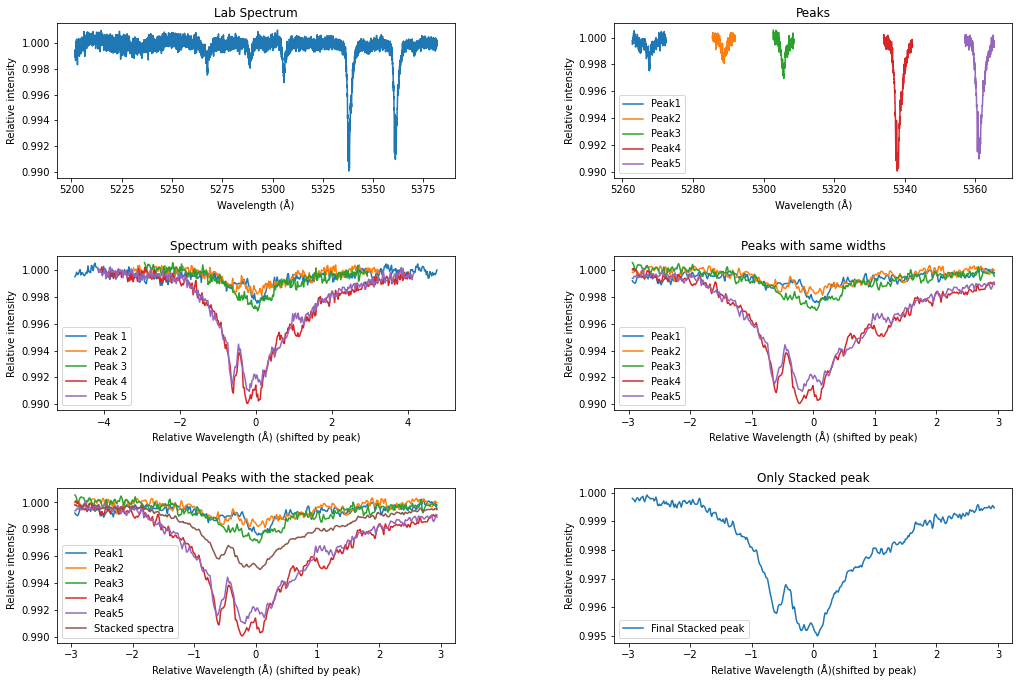

In [113]:
spectral_stacker_voigt(snr5000,peaks)